
# Introduction to Data Science Course Final Project
   ### by Tal Somech

<img src="./image/regression.jpeg">

 kaggle link: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
df=pd.read_csv(r"./data/data.csv")


# Data Features:
## Primary:
-  id (Id of track generated by Spotify)
## Numerical:
-  acousticness (Ranges from 0 to 1)
-  danceability (Ranges from 0 to 1)
-  energy (Ranges from 0 to 1)
-  duration_ms (Integer typically ranging from 200k to 300k)
-  instrumentalness (Ranges from 0 to 1)
-  valence (Ranges from 0 to 1)
-  popularity (Ranges from 0 to 100)
-  tempo (Float typically ranging from 50 to 150)
-  liveness (Ranges from 0 to 1)
-  loudness (Float typically ranging from -60 to 0)
-  speechiness (Ranges from 0 to 1)
-  year (Ranges from 1921 to 2020)
## Dummy:
-  mode (0 = Minor, 1 = Major)
-  explicit (0 = No explicit content, 1 = Explicit content)
## Categorical:
-  key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
-  artists (List of artists mentioned)
-  release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
-  name (Name of the song)

# Goal : 
 ## find the popularity of a song based on the features specified above
 
 
 ### lets start by showing the data

In [2]:
df['artists+name'] = df.apply(lambda row: row['artists'] + row['name'], axis=1)
dup = df[df['artists+name'].duplicated()]

In [3]:
df.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists+name
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna..."
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,['Ashnikko']Halloweenie III: Seven Days
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,['MAMAMOO']AYA
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,['Eminem']Darkness
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991,"['KEVVO', 'J Balvin']Billetes Azules (with J B..."


### as we can see there are a few duplicated , they are rated diffrently on whether 
### they are from an album or a single ,thus we want to drop the duplicated
### so it wont damage our model

In [4]:
# We gather the list of indices corresponding to the maximum popularity for each duplicated artist/song pair.
indices = []

for name in dup['artists+name'].unique():
    subset = df[df['artists+name'] == name].copy()
    m = subset['popularity'].max()
    index = subset[subset['popularity'] == m].index[0]
    subset = subset[subset.popularity != m]
    if subset.shape[0]==0:
        indices.append(index)
    else:
        indices.extend(list(subset.index.values))
df=df.drop(indices)

# now i dont know how to turn the artists in to categorial but what i can do
# is take the mean of all the songs of the artist and make a new column
# not perfect,but looks better

In [26]:
train_mean_pop = df['popularity'].mean()

for artist in df['artists'].unique():
    temp = df[df['artists'] == artist]['popularity'].copy()
    if len(temp) > 1:
        df.loc[df['artists']==artist,'artist_pop']=temp.mean()
    elif len(temp) == 1:
        df.loc[df['artists']==artist,'artist_pop']= train_mean_pop
    else:
        print('Stopping iteration due to unexpected result.')
        break

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists+name,artist_pop
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",31.534287
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,['Dennis Day']Clancy Lowered the Boom,3.000000
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,2.428571
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,['Frank Parker']Danny Boy,31.534287
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,['Phil Regan']When Irish Eyes Are Smiling,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",31.534287
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,['Ashnikko']Halloweenie III: Seven Days,70.600000
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,['MAMAMOO']AYA,73.400000
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,['Eminem']Darkness,57.672131


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157842 entries, 0 to 170652
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           157842 non-null  float64
 1   year              157842 non-null  int64  
 2   acousticness      157842 non-null  float64
 3   artists           157842 non-null  object 
 4   danceability      157842 non-null  float64
 5   duration_ms       157842 non-null  int64  
 6   energy            157842 non-null  float64
 7   explicit          157842 non-null  int64  
 8   id                157842 non-null  object 
 9   instrumentalness  157842 non-null  float64
 10  key               157842 non-null  int64  
 11  liveness          157842 non-null  float64
 12  loudness          157842 non-null  float64
 13  mode              157842 non-null  int64  
 14  name              157842 non-null  object 
 15  popularity        157842 non-null  int64  
 16  release_date      15

In [29]:
df['popularity'].describe()

count    157842.000000
mean         31.534287
std          21.986394
min           0.000000
25%          11.000000
50%          34.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

## i have the year so i know the exact date won't help me here so i can delete it , and i want to change the duration to minuets
## instead of miliseconds

In [30]:
df['duration']=df['duration_ms']/60000
df=df.drop(columns=['duration_ms','release_date','id','name'],axis =1)

# Visualisation of the data

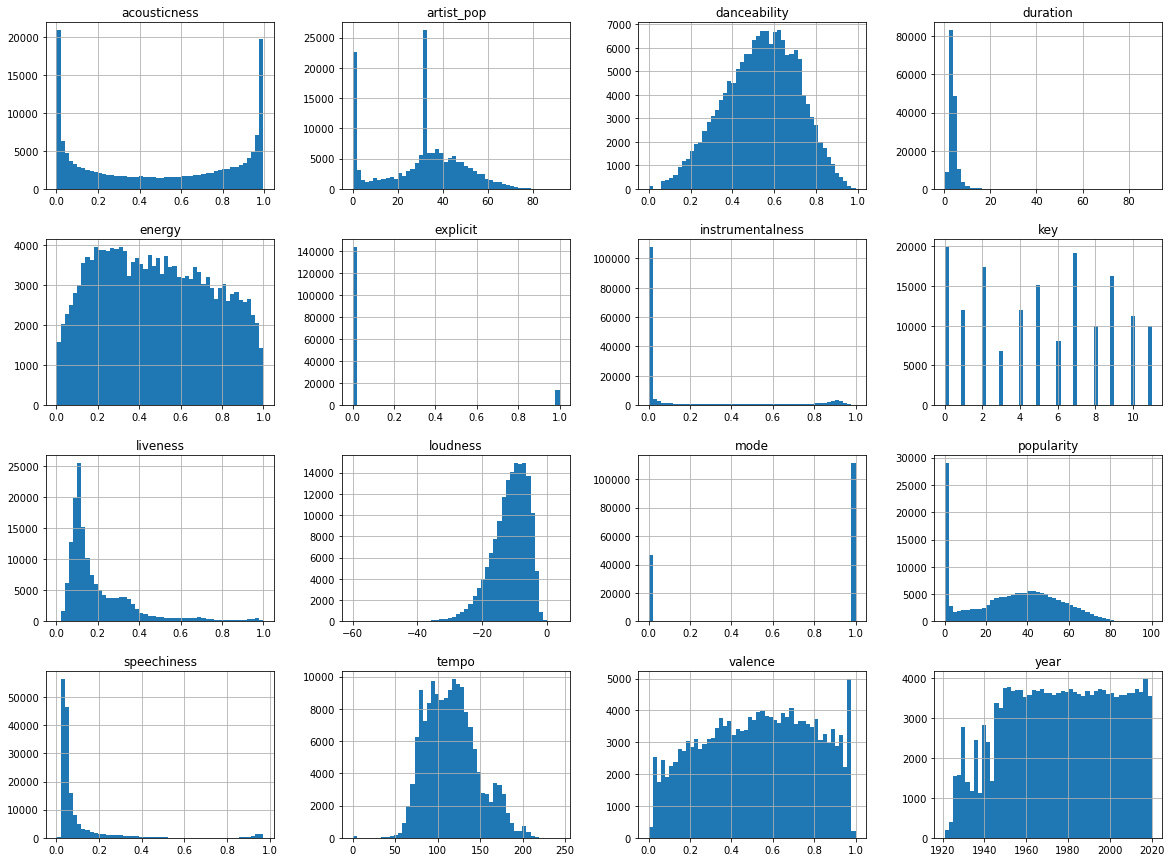

In [31]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [32]:
df['artist_pop'].max()

92.0

# lets see the 10 most popular artists

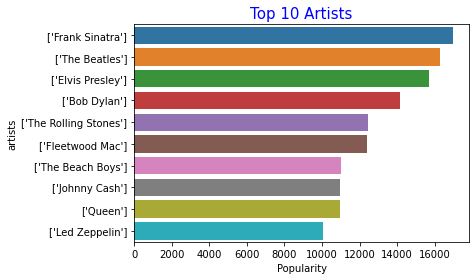

In [33]:
fig,ax=plt.subplots()
lead_artists=df.groupby('artists')['popularity'].sum().sort_values(ascending=False)
ten_lead=lead_artists.head(10)
ax=sns.barplot(x=ten_lead.values,y=ten_lead.index)
ax.set_xlabel("Popularity")
ax.set_title("Top 10 Artists",c='b',fontsize=15)
plt.show()

## note to self , when i added the drop duplicates function some of the top 10 artists changed , why is that ? could i be missing something important ? although i highly think that the beatles are better then Frank Sinatra






# i want to know the correalation between each feature
# for this i will use the heatmap function

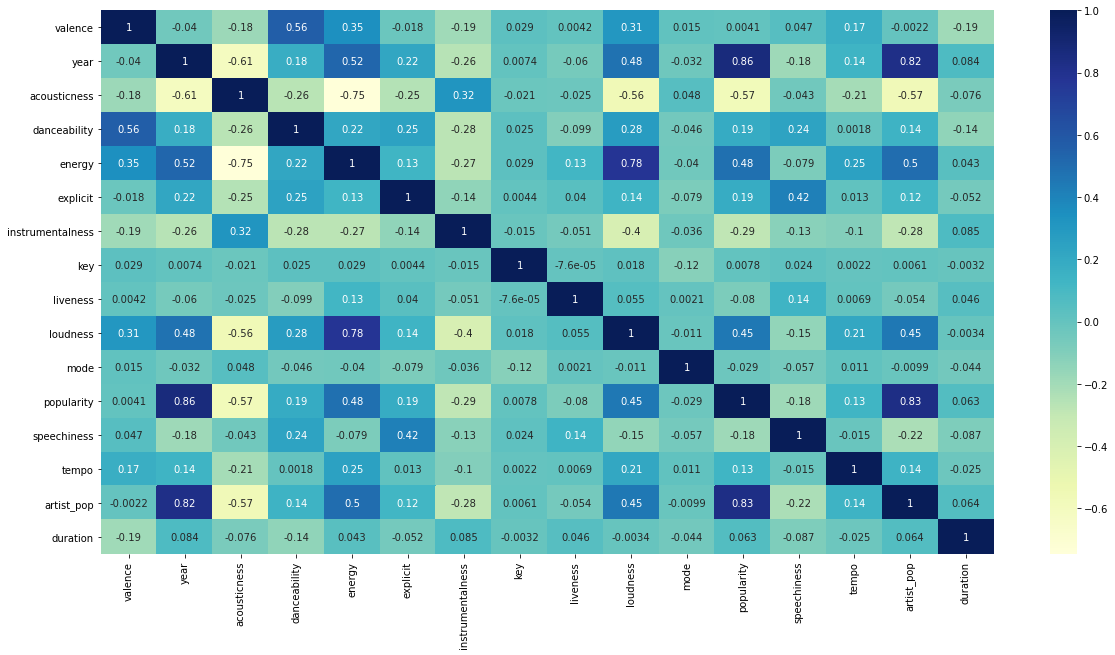

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

# pairplot of the data in corr to popularity

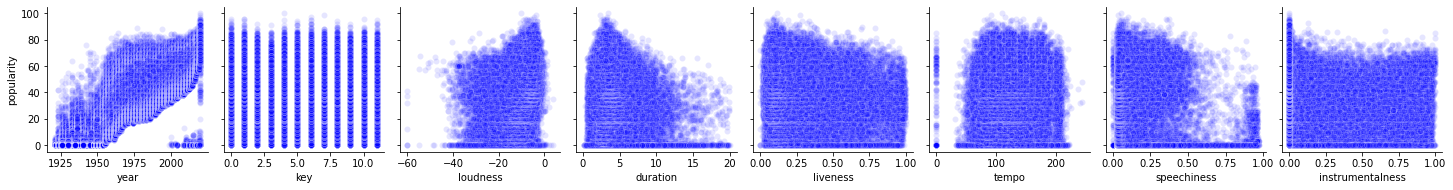

In [43]:
pp = sns.pairplot(data=df,
                  y_vars=['popularity'],
                  x_vars=['year', 'key', 'loudness','duration','liveness'
                         ,'tempo','speechiness','instrumentalness'],
                  kind='scatter', plot_kws={'color':'b','alpha':0.1},palette='r')

### now that we showed some cool stuff related to the data lets clean it
### some more , lets check any outliners , we want our songs to be max 20 min
### on which i can see that are nature sounds and such

In [41]:
df=df[df['duration']<20]

### i would like to show the artists with most songs

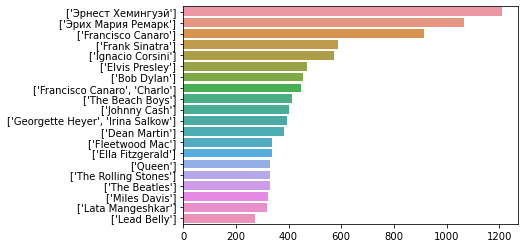

In [35]:
most_songs=df['artists'].value_counts().head(20)
sns.barplot(x=most_songs.values,y=most_songs.index)

### we show here the growth of the popularity over the years

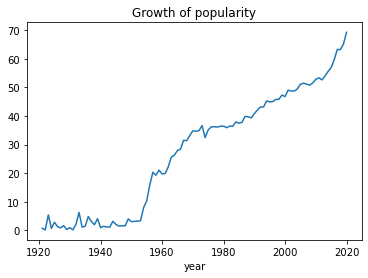

In [36]:
df.groupby('year')['popularity'].mean().plot(title="Growth of popularity")

## here we can see the growth of the beatles over the years

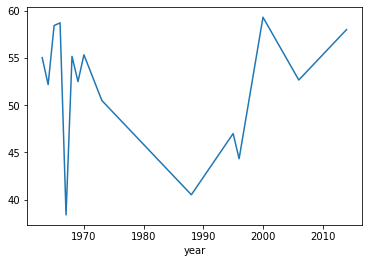

In [37]:
emi=df[df['artists']=="['The Beatles']"]
emi.groupby('year')['popularity'].mean().plot()

In [42]:
df

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,artists+name,artist_pop,duration
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",31.534287,13.861117
1,0.9630,1921,0.73200,['Dennis Day'],0.819,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936,['Dennis Day']Clancy Lowered the Boom,3.000000,3.008883
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,2.428571,8.334367
3,0.1650,1921,0.96700,['Frank Parker'],0.275,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109,['Frank Parker']Danny Boy,31.534287,3.500000
4,0.2530,1921,0.95700,['Phil Regan'],0.418,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665,['Phil Regan']When Irish Eyes Are Smiling,1.333333,2.778217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",31.534287,5.028567
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936,['Ashnikko']Halloweenie III: Seven Days,70.600000,2.510900
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688,['MAMAMOO']AYA,73.400000,3.521333
170651,0.1950,2020,0.00998,['Eminem'],0.671,0.623,1,0.000008,2,0.6430,-7.161,1,70,0.3080,75.055,['Eminem']Darkness,57.672131,5.619117


## here we want to show the duration of diffrent songs

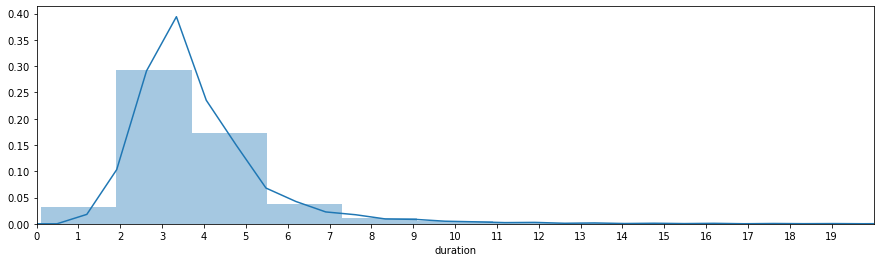

In [38]:
fig3, ax2 = plt.subplots(figsize = (15, 4))
ax2 = sns.distplot(df['duration'])
ax2.set_xticks(range(0,20,1))
ax2.set_xlim(0,20)
plt.show()

## next thing we'll show how the diffrent popularity varies

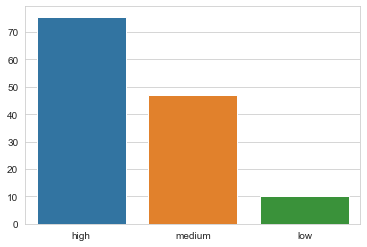

In [40]:
sns.set_style("whitegrid")
h=df[df['popularity']>70]
m=df[(df['popularity']<70)&(df['popularity']>30)]
l=df[df['popularity']<30]
h1=h.popularity.mean()
m1=m.popularity.mean()
l1=l.popularity.mean()
sns.barplot(["high","medium","low"],y=[h1,m1,l1])

### now we want to start model , for now i will drop the artists column as i
### dont know how to deal with the string type , i saw someone use 
### Target encoder , but i couldent understand it , so i wont use it.

In [43]:
df=df.drop(columns=['artists','mode','artists+name'])

#### first i want to split the data to test and train , afterwhich i will scale and normalize the data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('popularity',axis=1)
                                               ,df['popularity'],random_state=42)
from sklearn.preprocessing import StandardScaler
df['popularity']=df['popularity']/100
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### i dont like to repeat myself , so ill use a function so that every new model ill train
### i can send to this function which will show me how the model did.

In [45]:
def print_scores(model,cx_test,cy_test):
    c_pred=model.predict(cx_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(cy_test, c_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(cy_test, c_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(cy_test, c_pred)))
    print(f'{type(model).__name__} score: ',model.score(cx_test,cy_test)*100)
    plt.plot(cy_test, c_pred, 'o')
    ln, b = np.polyfit(y_test, c_pred,1)#polyfit is Least squares polynomial fit.
    plt.plot(cy_test,ln*cy_test+b)

# Linear Regression - model which creates a sort of polynomic function to train the data

Mean Absolute Error: 7.328711047167086
Mean Squared Error: 98.37837148553922
Root Mean Squared Error: 9.918587171847571
LinearRegression score:  79.44035086986895


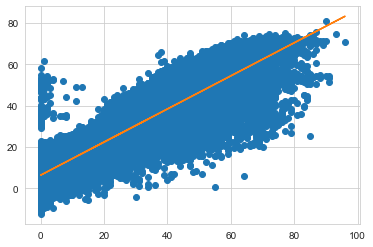

In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print_scores(lr,x_test,y_test)

# dummy regressor - using the median strategy, not a very good model..

Mean Absolute Error: 18.466587263373963
Mean Squared Error: 485.16809001292415
Root Mean Squared Error: 22.026531502098194
DummyRegressor score:  -1.3930760306169576


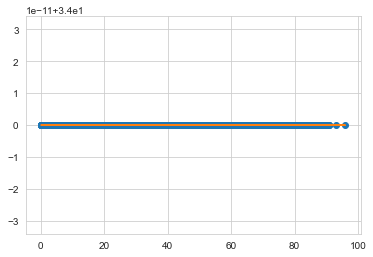

In [47]:
from sklearn.dummy import DummyRegressor
dummy_clf = DummyRegressor(strategy="median")
dummy_clf.fit(x_train,y_train)
print_scores(dummy_clf,x_test,y_test)

# RandomForestRegressor which uses desicion trees

Mean Absolute Error: 5.728923329363169
Mean Squared Error: 70.4649802921161
Root Mean Squared Error: 8.394342159580827
RandomForestRegressor score:  85.2738437433836


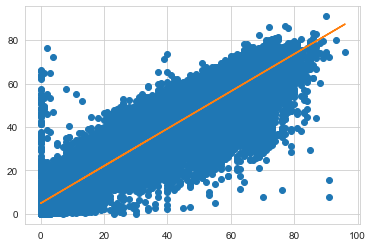

In [48]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
print_scores(clf,x_test,y_test)

### on the first try the logistic regression score was : 75
### on the first try the random forest score was : 81
### We can actually see an improvment!
### further improvment can be be : 
-  turning the artists to a more accurate feature , like splitting it to duet , solo ,caculate the mean of all the artists in a song with 1 or more artists
-  add maybe another feature byself
-  try more regressors
-  add a feature which shows whether the song is from an album or a single